In [1]:
import seaborn as sns
sns.set()
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score 
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


## 1. Read the Data

In [2]:
train_data = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
test_data = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

In [3]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## 2. Data exploration

#### Check NaN

In [5]:
#Copy the train_data
train_Data = train_data.copy() 

#Check NaN
train_Data.isna().sum() 

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## 3. Create a pivot tabel

In [6]:
train_Data = train_Data.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum') 

In [7]:
train_Data.head() 

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

In [8]:
train_Data.columns

MultiIndex([('item_cnt_day',  0),
            ('item_cnt_day',  1),
            ('item_cnt_day',  2),
            ('item_cnt_day',  3),
            ('item_cnt_day',  4),
            ('item_cnt_day',  5),
            ('item_cnt_day',  6),
            ('item_cnt_day',  7),
            ('item_cnt_day',  8),
            ('item_cnt_day',  9),
            ('item_cnt_day', 10),
            ('item_cnt_day', 11),
            ('item_cnt_day', 12),
            ('item_cnt_day', 13),
            ('item_cnt_day', 14),
            ('item_cnt_day', 15),
            ('item_cnt_day', 16),
            ('item_cnt_day', 17),
            ('item_cnt_day', 18),
            ('item_cnt_day', 19),
            ('item_cnt_day', 20),
            ('item_cnt_day', 21),
            ('item_cnt_day', 22),
            ('item_cnt_day', 23),
            ('item_cnt_day', 24),
            ('item_cnt_day', 25),
            ('item_cnt_day', 26),
            ('item_cnt_day', 27),
            ('item_cnt_day', 28),
            ('

In [9]:
#Combine the test_data to train_Data_Nov for prediction
test_Data = test_data.copy()
test_Data = test_Data.pivot_table(index = ['shop_id','item_id'],fill_value = 0)
Combine_train_test = pd.merge(test_Data, train_Data, how = 'left', on = ['shop_id','item_id']).fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  after removing the cwd from sys.path.


In [10]:
Combine_train_test = Combine_train_test.sort_values(by = 'ID')

In [11]:
Combine_train_test.head(10)

ID  (item_cnt_day, 0)  (item_cnt_day, 1)  (item_cnt_day, 2)  \
shop_id item_id                                                                
5       5037      0                0.0                0.0                0.0   
        5320      1                0.0                0.0                0.0   
        5233      2                0.0                0.0                0.0   
        5232      3                0.0                0.0                0.0   
        5268      4                0.0                0.0                0.0   
        5039      5                0.0                0.0                0.0   
        5041      6                0.0                0.0                0.0   
        5046      7                0.0                0.0                0.0   
        5319      8                0.0                0.0                0.0   
        5003      9                0.0                0.0                0.0   

                 (item_cnt_day, 3)  (item_cnt_day, 4)  (item_cnt_day, 5)  \
shop_id item_id                                                            
5       5037                   0.0                0.0                0.0   
        5320                   0.0                0.0                0.0   
        5233                   0.0                0.0                0.0   
        5232                   0.0                0.0                0.0   
        5268                   0.0                0.0                0.0   
        5039                   0.0                0.0                0.0   
        5041                   0.0                0.0                0.0   
        5046                   0.0                0.0                0.0   
        5319                   0.0                0.0                0.0   
        5003                   0.0                0.0                0.0   

                 (item_cnt_day, 6)  (item_cnt_day, 7)  (item_cnt_day, 8)  ...  \
shop_id item_id                                                           ...   
5       5037                   0.0                0.0                0.0  ...   
        5320                   0.0                0.0                0.0  ...   
        5233                   0.0                0.0                0.0  ...   
        5232                   0.0                0.0                0.0  ...   
        5268                   0.0                0.0                0.0  ...   
        5039                   0.0                0.0                0.0  ...   
        5041                   0.0                0.0                0.0  ...   
        5046                   0.0                0.0                0.0  ...   
        5319                   0.0                0.0                0.0  ...   
        5003                   0.0                0.0                0.0  ...   

                 (item_cnt_day, 24)  (item_cnt_day, 25)  (item_cnt_day, 26)  \
shop_id item_id                                                               
5       5037                    2.0                 0.0                 0.0   
        5320                    0.0                 0.0                 0.0   
        5233                    0.0                 0.0                 0.0   
        5232                    0.0                 0.0                 0.0   
        5268                    0.0                 0.0                 0.0   
        5039                    1.0                 0.0                 0.0   
        5041                    0.0                 0.0                 0.0   
        5046                    0.0                 0.0                 1.0   
        5319                    9.0                 2.0                 3.0   
        5003                    0.0                 0.0                 0.0   

                 (item_cnt_day, 27)  (item_cnt_day, 28)  (item_cnt_day, 29)  \
shop_id item_id                                                               
5       5037                    0.0                 1.0        

## 4. Deep Learning

### Split the training_data and training_target

In [12]:
train_data.shape

(2935849, 6)

In [13]:
#Drop the ID
Combine_train_test = Combine_train_test.drop(columns = ['ID'])

#Train Data
train_data = np.array(Combine_train_test.values[:,:-1]).reshape(np.array(Combine_train_test.values[:,:-1]).shape[0],np.array(Combine_train_test.values[:,:-1]).shape[1], 1)
#The target 
train_target = Combine_train_test.values[:,-1:]

test_data = np.array(Combine_train_test.values[:,1:]).reshape(np.array(Combine_train_test.values[:,1:]).shape[0],np.array(Combine_train_test.values[:,1:]).shape[1], 1)

### Bulid the model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, TimeDistributed, Flatten

In [15]:
#LSTM
model = Sequential()
model.add(LSTM(55, return_sequences = True, input_shape = (train_data.shape[1], 1)))
model.add(LSTM(55, return_sequences = True, ))
model.add(LSTM(55))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
#Conv1D
#def model_Conv1D():
    #model = Sequential()
    #model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (train_data.shape[1],train_data.shape[2], )))
    #model.add(MaxPooling1D(pool_size = 2))
    #model.add(Conv1D(filters = 50, kernel_size = 2, activation = 'relu'))
    #model.add(MaxPooling1D(pool_size = 2))
    #model.add(Flatten())
    #model.add(Dense(50))
    #model.add(Dropout(rate = 0.3))
    #model.add(Dense(1))
    #model.compile(optimizer= 'rmsprop', loss = 'mse', metrics = ['mse'])
    #return model

#Conv1D_LSTM
#def model_Conv1D_LSTM():
    #subsequences := 3
    #model = Sequential()
    #model.add(TimeDistributed(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (None, train_data.shape[1] // 3,train_data.shape[2], ))))
    #model.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
    #model.add(TimeDistributed(Flatten()))
    #model.add(LSTM(30))
    #model.add(Dropout(rate = 0.3))
    #model.add(Dense(1))
    #model.compile(optimizer= 'rmsprop', loss = 'mse', metrics = ['mse'])
    #return model
    
    
    

2022-02-22 17:11:05.774567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:11:05.872594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:11:05.873257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-22 17:11:05.874327: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
#Model 
history_1 = model.fit(train_data, train_target, epochs = 10, batch_size = 4)
df_his1 = pd.DataFrame(history_1.history)

#Model 2
#history_2 = model_Conv1D().fit(train_data, train_target, epochs = 15)
#df_his2 = pd.DataFrame(history_2.history)

#Model 3
#train_data_1 = train_data.reshape((train_data.shape[0], 3 , train_data.shape[1] // 3 , 1))
#history_3 = model_Conv1D_LSTM().fit(train_data_1, train_target, epochs = 15)
#df_his3 = pd.DataFrame(history_3.history)



2022-02-22 17:11:08.761747: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-02-22 17:11:12.248923: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


53550/53550 [==============================] - 368s 7ms/step - loss: 28.3057 - mse: 28.3057
Epoch 2/10
53550/53550 [==============================] - 374s 7ms/step - loss: 27.9472 - mse: 27.9472
Epoch 3/10
53550/53550 [==============================] - 372s 7ms/step - loss: 27.2403 - mse: 27.2403
Epoch 4/10
53550/53550 [==============================] - 376s 7ms/step - loss: 27.4590 - mse: 27.4590
Epoch 5/10
53550/53550 [==============================] - 373s 7ms/step - loss: 27.5990 - mse: 27.5990
Epoch 6/10
53550/53550 [==============================] - 377s 7ms/step - loss: 26.7726 - mse: 26.7726
Epoch 7/10
53550/53550 [==============================] - 373s 7ms/step - loss: 27.4827 - mse: 27.4827
Epoch 8/10
53550/53550 [==============================] - 382s 7ms/step - loss: 27.1660 - mse: 27.1660
Epoch 9/10
53550/53550 [==============================] - 367s 7ms/step - loss: 26.5585 - mse: 26.5585
Epoch 10/10
53550/53550 [==============================] - 368s 7ms/step - loss: 26.

### Mean Square Roots and Epochs

<AxesSubplot:ylabel='loss'>

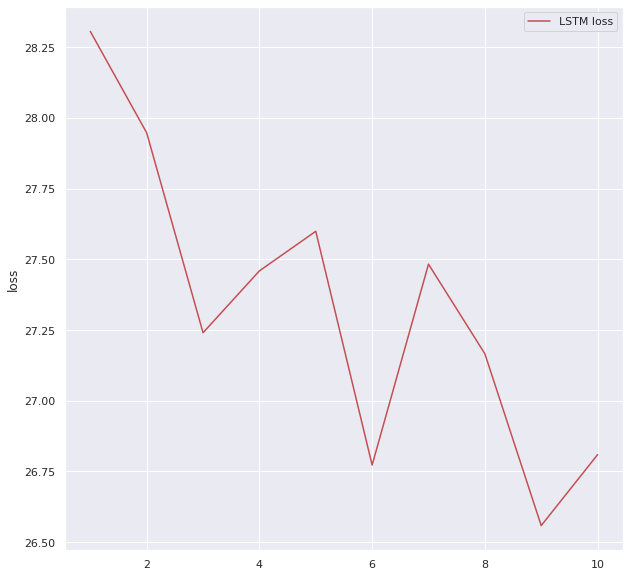

In [17]:
plt.figure(figsize = (10 , 10))
sns.lineplot(x= df_his1.index + 1, y = df_his1['loss'], color='r', label="LSTM loss")
#sns.lineplot(x= df_his2.index + 1, y= df_his2['loss'], color='g', label="Conv1D loss")
#sns.lineplot(x= df_his3.index + 1, y= df_his3['loss'], color='b', label="Conv1D+LSTM loss")
#plt.legend()
#plt.show()

In [18]:
submission = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')
submission['item_cnt_month'] = model.predict(test_data).clip(0,30).round(0)
submission.to_csv('submission.csv', index=False)

In [19]:
submission

,ID,item_cnt_month
0,0,1.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
214195,214195,0.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0
